## Bike Sharing Assignment - Abhirami S

#### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:

To model the demand for shared bikes with the available independent variables, to be used by the management to understand how exactly the demands vary with different features.

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [4]:
#Import the data file
bike_df = pd.read_csv('day.csv')

#### Data Cleaning & EDA

In [5]:
# Observe the bike rental dataset
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# We remove the columns with low relevance for our model
bike_df = bike_df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

In [7]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
# We check for any null-values and datatype of the columns
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [9]:
#We can see their is no null values values & the data has numerical and categorical features

In [10]:
# Understanding the target variable

bike_df['cnt'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

> Observation-

Target variable, cnt, has a minimum value of 22 & maximum of 8714.
- This implies that each day there is a minimum of 22 bike rentals to max of 8714 bike rentals with an average of 4508 bikes per day.

Text(0.5, 0.98, 'Total Rented Bikes')

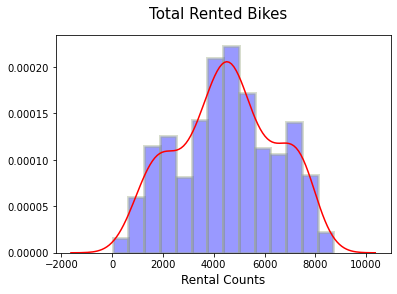

In [11]:
#Visualising the "cnt" value for better understanding

fig, ax = plt.subplots(1)
sns.distplot(bike_df['cnt'],color='red', hist_kws=dict(edgecolor = '#9dab86' , linewidth= 3, color="b"))
ax.set_xlabel('Rental Counts', fontsize = 12)
fig.suptitle('Total Rented Bikes', fontsize = 15)

> Observation:

We can see that majority of the value lie between 4000-5000. This gives us the daily average of bikes rented per day, with a maximum of 8000 per day.

### Comparing 'temp' & 'atemp' 

- This is done two ways 
    1. By visualisation
    2. By correlation matrix

<Figure size 432x288 with 0 Axes>

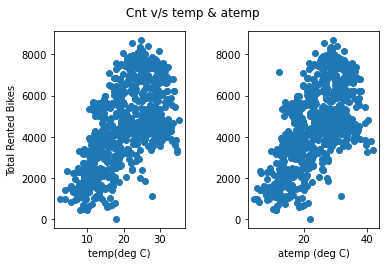

In [12]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 1, ncols = 2)

plt.subplot(1,2,1)
ax1 = plt.scatter(bike_df['temp'], bike_df['cnt'])
plt.xlabel('temp(deg C)')
plt.ylabel('Total Rented Bikes')

plt.subplot(1,2,2)
ax2 = plt.scatter(bike_df['atemp'], bike_df['cnt'])
plt.suptitle('Cnt v/s temp & atemp')
plt.xlabel('atemp (deg C)')

f.tight_layout(pad=3.0)

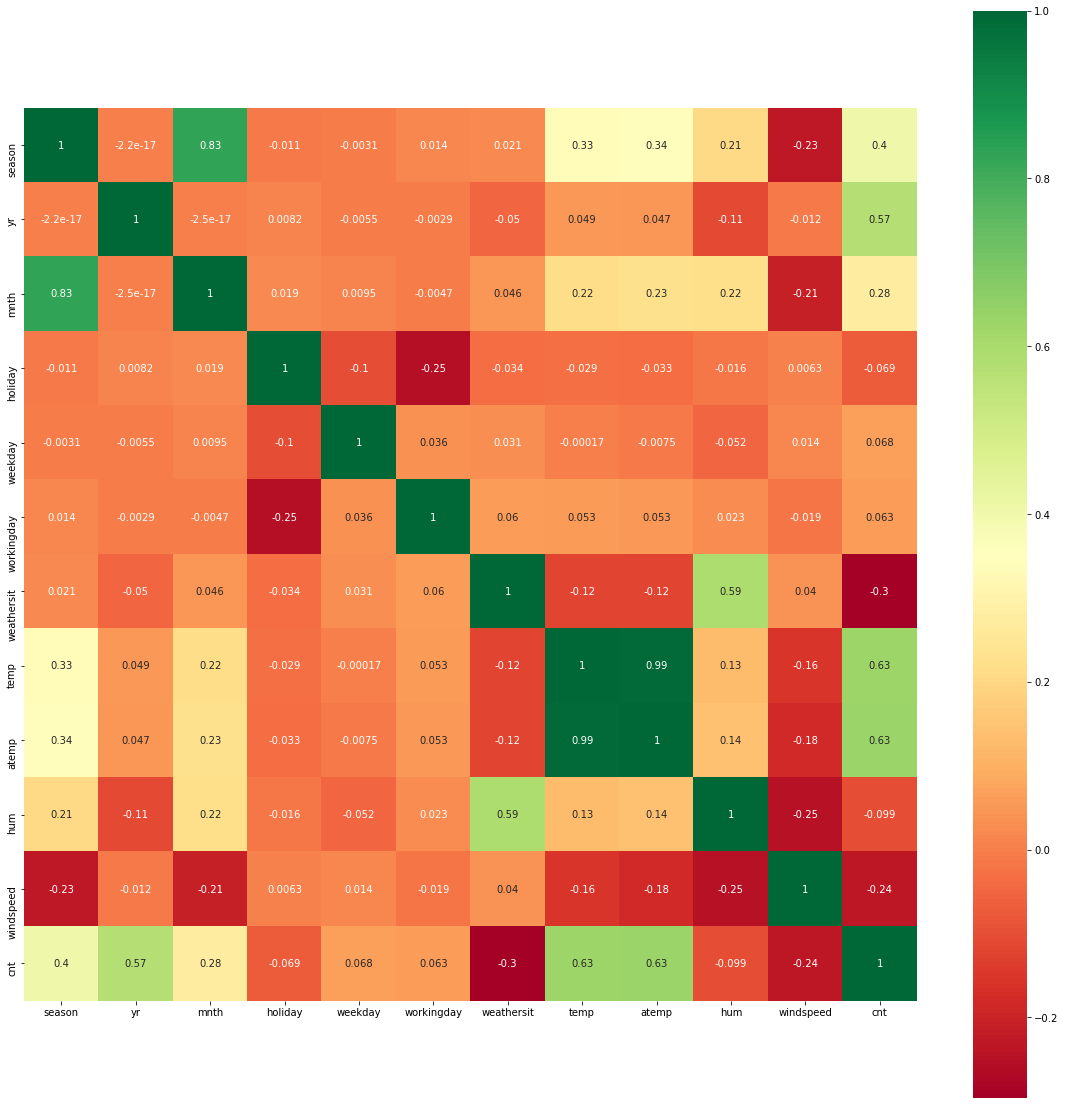

In [13]:
# By correlation matrix

plt.figure(figsize=(20,20)) 
sns.heatmap(bike_df.corr(), annot=True,cmap='RdYlGn',square=True)  

> Observation:

- By visualisation - We observe that, the range and distribution of temp & atemp values are similar. 
- By correlation - We see that they have a corr value of 0.99, which implies their correlation to be high. 

In this case, we can drop either one of them to avoid disparency/multicollinearity issue while building the model.

In [14]:
# We drop out 'atemp' here.

bike_df = bike_df.drop(['atemp'], axis=1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


### Understanding the influence of temp, humidity, windspeed (Continous variables) on bike rental

Text(-2.700000000000003, 0.5, 'Total Rented Bikes')

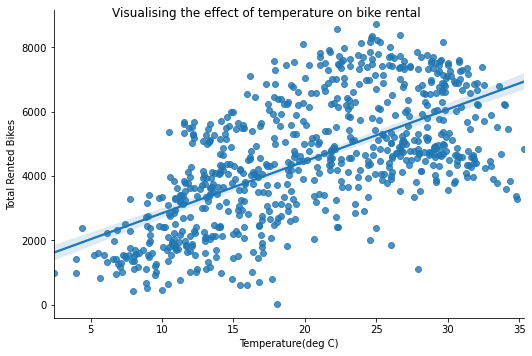

In [15]:
# Temperature vs bike rental count

sns.lmplot(x='temp', y='cnt', data=bike_df, aspect=1.5)
plt.suptitle('Visualising the effect of temperature on bike rental')
plt.xlabel('Temperature(deg C)')
plt.ylabel('Total Rented Bikes')


> Observation:

- We observe that the number of rental bikes increases as the temp increases. 
- This agrees with the correlation matrix above, that temp and count have a positive correlation.

Text(-2.700000000000003, 0.5, 'Total Rented Bikes')

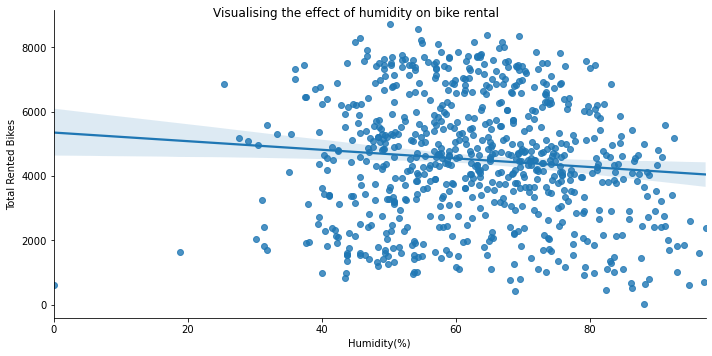

In [16]:
# Humidity vs bike rental count

sns.lmplot(x='hum', y='cnt', data=bike_df, aspect=2)
plt.suptitle('Visualising the effect of humidity on bike rental')
plt.xlabel('Humidity(%)')
plt.ylabel('Total Rented Bikes')

> Observation:

- We see that there is maximum rental between 40% - 80% humidity. 
- For humidity between 0% - 40% the numbers are very low. 
- For humidity between 80% - 100%, we see that the rental rate is below average.

We can concur that, people prefer to rent bike in average humidity ranges and avoid renting bikes during dry & over-humid days. This agrees with the correlation matrix also.

Text(-2.700000000000003, 0.5, 'Total Rented Bikes')

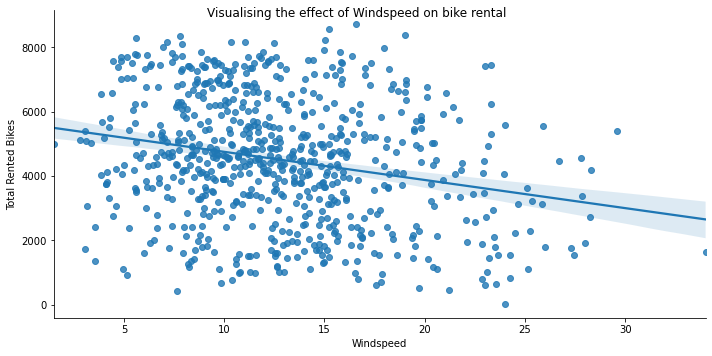

In [17]:
# Windspeed vs bike rental count

sns.lmplot(x='windspeed', y='cnt', data=bike_df, aspect=2)
plt.suptitle('Visualising the effect of Windspeed on bike rental')
plt.xlabel('Windspeed')
plt.ylabel('Total Rented Bikes')

> Observation:

- We observe maximum rental count density between windspeed of 5-18. Between this range, the most preferred windspeed seems to be between 7-15.
- With increase in windspeed the rental count drops

We concur that, windspeed has an negative effect on bike rental count. (This is seen in the correlation matrix also)

<Figure size 432x288 with 0 Axes>

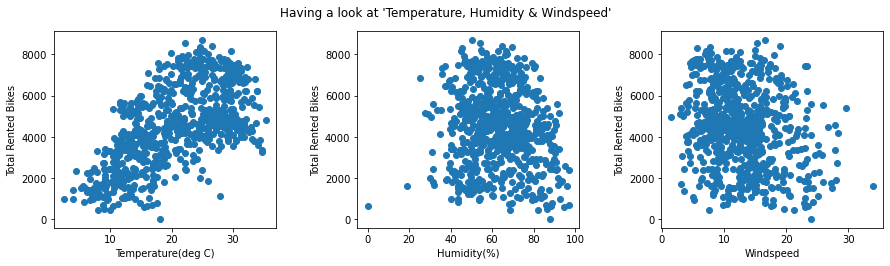

In [18]:
# Having a look together - temp, humidity & windspeed

f = plt.figure()    
f, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(13,4))

#Temperature
plt.subplot(1,3,1)
plt.scatter(bike_df['temp'], bike_df['cnt'])
plt.xlabel('Temperature(deg C)')
plt.ylabel('Total Rented Bikes')

#Humidity
plt.subplot(1,3,2)
plt.scatter(bike_df['hum'], bike_df['cnt'])
plt.xlabel('Humidity(%)')
plt.ylabel('Total Rented Bikes')

#Windspeed
plt.subplot(1,3,3)
plt.scatter(bike_df['windspeed'], bike_df['cnt'])
plt.suptitle("Having a look at 'Temperature, Humidity & Windspeed'")
plt.xlabel('Windspeed')
plt.ylabel('Total Rented Bikes')

f.tight_layout(pad=3.0)

### Understanding the influence of season, year, month, holiday, weekday, working day & weather situation (Categorical variables) on bike rental

In [19]:
# Mapping Season, Month, Weekday & Weathersit with strings
bike_df['season'] = bike_df['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike_df['mnth'] = bike_df['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_df['weekday'] = bike_df['weekday'].map({0: 'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thurs',5:'Fri',6:'Sat'})
bike_df['weathersit'] = bike_df['weathersit'].map({1:'Clear', 2:'Misty+Cloudy', 3:'Light Snow/Rain', 4:'Heavy Snow/Rain'})
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty+Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty+Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


Text(0.5, 0.98, 'Understanding the influence of season, month, holiday, weekday, working day & weather situation on bike rental')

<Figure size 432x288 with 0 Axes>

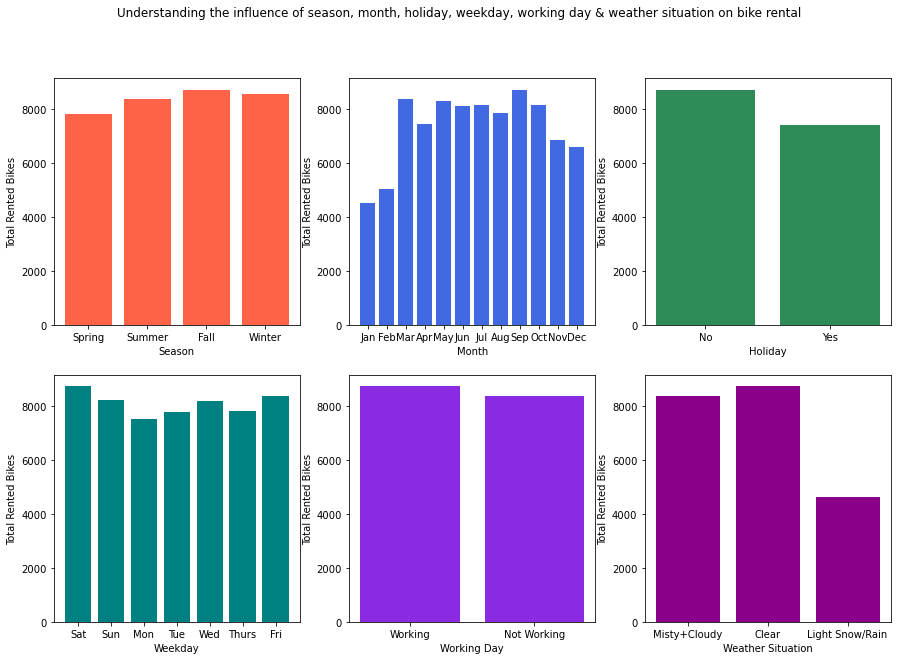

In [20]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(15,10))

plt.subplot(2,3,1)
plt.bar(bike_df['season'], bike_df['cnt'],color='tomato')
plt.xlabel('Season')
plt.ylabel('Total Rented Bikes')

plt.subplot(2,3,2)
plt.bar(bike_df['mnth'], bike_df['cnt'],color='royalblue')
plt.xlabel('Month')
plt.ylabel('Total Rented Bikes')

plt.subplot(2,3,3)
plt.bar(bike_df['holiday'], bike_df['cnt'],color='seagreen')
positions = (0,1)
labels = ('No','Yes')
plt.xticks(positions, labels)
plt.xlabel('Holiday')
plt.ylabel('Total Rented Bikes')

plt.subplot(2,3,4)
plt.bar(bike_df['weekday'], bike_df['cnt'],color='teal')
plt.xlabel('Weekday')
plt.ylabel('Total Rented Bikes')

plt.subplot(2,3,5)
plt.bar(bike_df['workingday'], bike_df['cnt'],color='blueviolet')
positions = (0,1)
labels = ('Working','Not Working')
plt.xticks(positions, labels)
plt.xlabel('Working Day')
plt.ylabel('Total Rented Bikes')

plt.subplot(2,3,6)
plt.bar(bike_df['weathersit'], bike_df['cnt'],color='darkmagenta')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rented Bikes')

plt.suptitle("Understanding the influence of season, month, holiday, weekday, working day & weather situation on bike rental")


> Observation:

- Season - We notice in the graph that season is displaying an abnormality. The bike rental count during winter is observed to be higher than spring, which is unusual.
-- The reason for this could be the months are not clearly defined for the seasons. We do not have a clear idea on when winter starts and ends.
- Month - We observe that, rentals during Nov,Dec,Jan,Feb are low. This is due to the low temperature. This graph is inline with out previous observation with 'temperatue'
- Holiday - We see that holiday does not affect the rental count. It has a very slight difference.
- Weekday - We see that weekends have a slightly higher rental count.
- Working day - This has almost the same rental count for both. We can concur that, this factor is not related to rental count. (we can drop this column)
- Weather Situation - We observe high rentals during clear days & misty days. With mild onset of rains, the rental count dips signficantly. We also see zero rental count during heavy rain.

In [21]:
# Dropping workingday

bike_df = bike_df.drop(['workingday'], axis=1)

Text(0.5, 0.98, 'Understanding the year-on-year growth of bike rental')

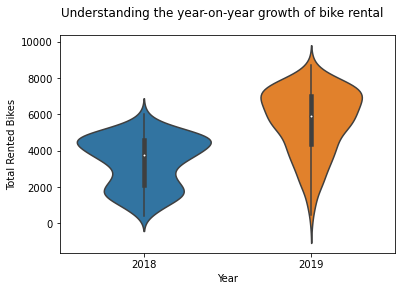

In [22]:
# Checking the relation between cnt & yr through violin plot

fig, ax = plt.subplots(1)
sns.violinplot(data=bike_df[['yr','cnt']], x='yr', y='cnt',ax=ax)
positions = (0,1)
labels = ('2018','2019')
plt.xticks(positions, labels)
plt.xlabel('Year')
plt.ylabel('Total Rented Bikes')
plt.suptitle("Understanding the year-on-year growth of bike rental")

> Observation:

We observe that the bike rental has increased significatly in the year 2019. This shows that Boombikes has had a good growth in 2019.

In [23]:
# Converting Season string variables to dummy variables

season_dummies = pd.get_dummies(bike_df.season, prefix='season')

# We drop the first column as season_spring will be the baseline
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

# We concatenate the original bike_df with season_dummies
bike_df = pd.concat([bike_df, season_dummies], axis=1)

# Dropping the original column 'season'
bike_df = bike_df.drop(['season'], axis=1)

bike_df.head()


,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter
0,0,Jan,0,Sat,Misty+Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Sun,Misty+Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Mon,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Tue,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Wed,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [24]:
# Converting mnth string variables to dummy variables

month_dummies = pd.get_dummies(bike_df.mnth, prefix='Month')

# We drop the first column
month_dummies.drop(month_dummies.columns[0], axis=1, inplace=True)

# We concatenate with the original bike_df 
bike_df = pd.concat([bike_df, month_dummies], axis=1)

# Dropping the original column
bike_df = bike_df.drop(['mnth'], axis=1)

bike_df.head()

,yr,holiday,weekday,weathersit,temp,hum,windspeed,cnt,season_Spring,season_Summer,...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0,Sat,Misty+Cloudy,14.110847,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Sun,Misty+Cloudy,14.902598,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Mon,Clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Tue,Clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Wed,Clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
# Converting weekday string variables to dummy variables

weekday_dummies = pd.get_dummies(bike_df.weekday, prefix='day')

# We drop the first column
weekday_dummies.drop(weekday_dummies.columns[0], axis=1, inplace=True)

# We concatenate with the original bike_df 
bike_df = pd.concat([bike_df, weekday_dummies], axis=1)

# Dropping the original column
bike_df = bike_df.drop(['weekday'], axis=1)

bike_df.head()

,yr,holiday,weathersit,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,Month_May,Month_Nov,Month_Oct,Month_Sep,day_Mon,day_Sat,day_Sun,day_Thurs,day_Tue,day_Wed
0,0,0,Misty+Cloudy,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,Misty+Cloudy,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,Clear,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,Clear,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,Clear,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
# Converting weathersit string variables to dummy variables

weathersit_dummies = pd.get_dummies(bike_df.weathersit, prefix='weather')

# We drop the first column
weathersit_dummies.drop(weathersit_dummies.columns[0], axis=1, inplace=True)

# We concatenate with the original bike_df 
bike_df = pd.concat([bike_df, weathersit_dummies], axis=1)

# Dropping the original column
bike_df = bike_df.drop(['weathersit'], axis=1)

bike_df.head()

,yr,holiday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,Month_Aug,...,Month_Oct,Month_Sep,day_Mon,day_Sat,day_Sun,day_Thurs,day_Tue,day_Wed,weather_Light Snow/Rain,weather_Misty+Cloudy
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Dividing the bike_df into Train and Test data

In [27]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
df_train.shape

(510, 28)

In [29]:
df_test.shape

(219, 28)

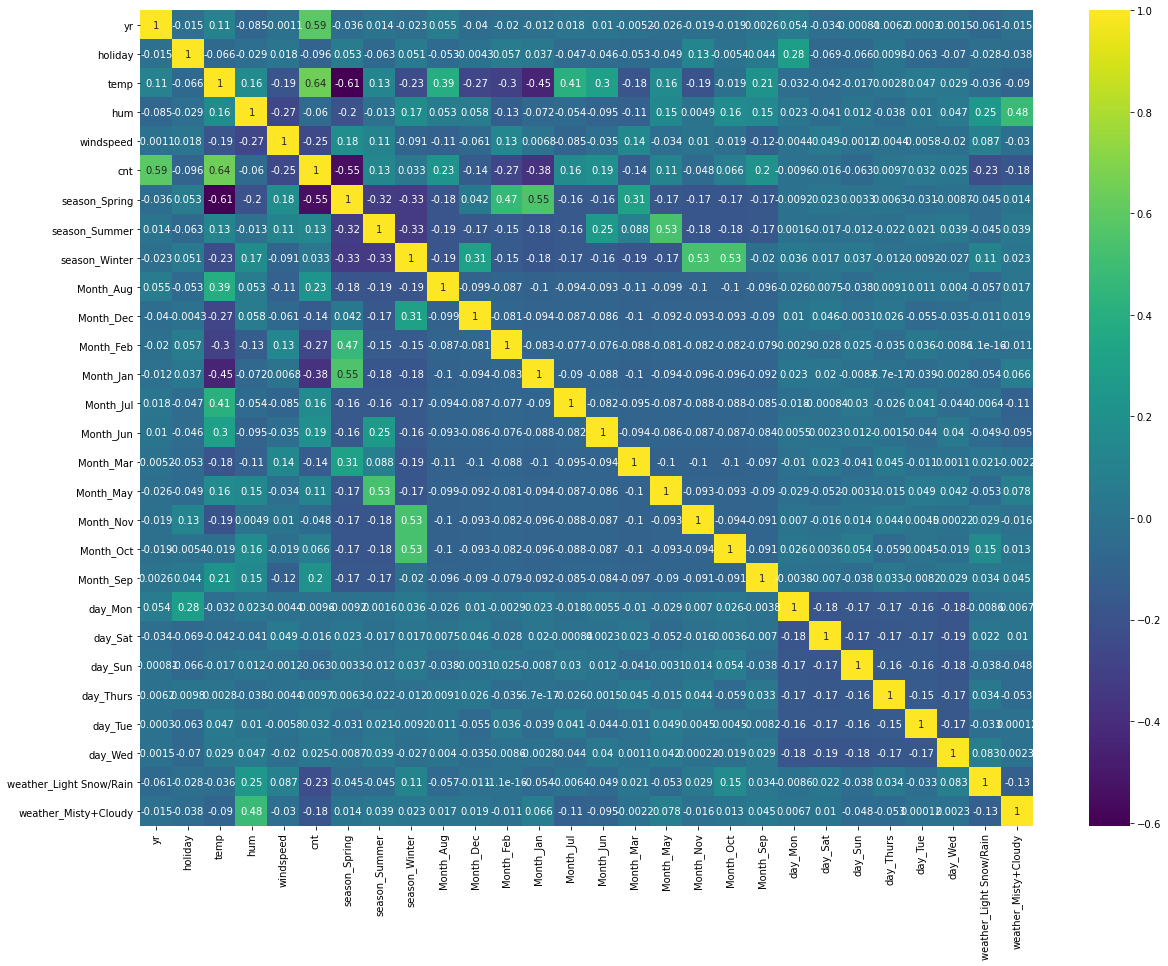

In [30]:
# Observing the correlation of train data

plt.figure(figsize = (20,15))
sns.heatmap(df_train.corr(), annot = True, cmap="viridis")
plt.show()

In [31]:
#Scaling the continous variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_train.head()

,yr,holiday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,day_Mon,day_Sat,day_Sun,day_Thurs,day_Tue,day_Wed,weather_Light Snow/Rain,weather_Misty+Cloudy
653,1,0,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [32]:
#Splitting X & Y for model

y_train = df_train.pop('cnt')
X_train = df_train

### Building the model

In [33]:
# Importing the required libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
# Running RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('Month_Aug', False, 5),
 ('Month_Dec', False, 2),
 ('Month_Feb', False, 3),
 ('Month_Jan', True, 1),
 ('Month_Jul', True, 1),
 ('Month_Jun', False, 11),
 ('Month_Mar', False, 12),
 ('Month_May', False, 4),
 ('Month_Nov', True, 1),
 ('Month_Oct', False, 8),
 ('Month_Sep', True, 1),
 ('day_Mon', False, 6),
 ('day_Sat', False, 13),
 ('day_Sun', True, 1),
 ('day_Thurs', False, 9),
 ('day_Tue', False, 7),
 ('day_Wed', False, 10),
 ('weather_Light Snow/Rain', True, 1),
 ('weather_Misty+Cloudy', True, 1)]

In [36]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'Month_Jan', 'Month_Jul', 'Month_Nov',
       'Month_Sep', 'day_Sun', 'weather_Light Snow/Rain',
       'weather_Misty+Cloudy'],
      dtype='object')

In [37]:
X_train.columns[~rfe.support_]

Index(['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jun', 'Month_Mar',
       'Month_May', 'Month_Oct', 'day_Mon', 'day_Sat', 'day_Thurs', 'day_Tue',
       'day_Wed'],
      dtype='object')

In [38]:
# Building the Model 1

# Creating X_train dataframe with RFE support variables
X_train_lm = X_train[col]

# Adding a constant variable to X_train_lm
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_lm)

lm = sm.OLS(y_train,X_train_lm).fit()   

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.2
Date:                Mon, 21 Sep 2020   Prob (F-statistic):          1.16e-191
Time:                        23:21:06   Log-Likelihood:                 520.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     494   BIC:                            -941.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [39]:
# Importing VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking for the VIF values of the RFE featured variables
# We create a dataframe that will contain the names of all the RFE featured variables and VIFs

vif = pd.DataFrame()
X_train_vif = X_train[col]
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.36
2,temp,16.80
4,windspeed,4.72
5,season_Spring,4.37
7,season_Winter,3.79
6,season_Summer,2.79
14,weather_Misty+Cloudy,2.31
0,yr,2.09
8,Month_Jan,1.67
9,Month_Jul,1.59


In [40]:
# Model 2

# We drop the insignificant variables

X = X_train_vif.drop('season_Spring', 1)

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.5
Date:                Mon, 21 Sep 2020   Prob (F-statistic):          2.66e-191
Time:                        23:21:06   Log-Likelihood:                 516.98
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [41]:
# Checking for the VIF values of the RFE featured variables in Model 2

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,18.73
2,temp,12.36
4,windspeed,3.63
6,season_Winter,2.51
13,weather_Misty+Cloudy,2.15
0,yr,2.04
5,season_Summer,1.86
9,Month_Nov,1.58
8,Month_Jul,1.55
7,Month_Jan,1.54


In [42]:
# Model 3

# We drop the insignificant variables

X = X_train_vif.drop(['season_Spring','Month_Nov'], 1)

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.4
Date:                Mon, 21 Sep 2020   Prob (F-statistic):          3.30e-192
Time:                        23:21:06   Log-Likelihood:                 516.35
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     496   BIC:                            -945.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [43]:
# Checking for the VIF values of the RFE featured variables in Model 3

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,18.73
2,temp,12.34
4,windspeed,3.61
12,weather_Misty+Cloudy,2.15
0,yr,2.04
6,season_Winter,1.97
5,season_Summer,1.86
8,Month_Jul,1.55
7,Month_Jan,1.54
9,Month_Sep,1.30


In [44]:
# Model 4

# We drop the insignificant variables

X = X_train_vif.drop(['season_Spring','Month_Nov','holiday'], 1)

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.2
Date:                Mon, 21 Sep 2020   Prob (F-statistic):          1.14e-189
Time:                        23:21:06   Log-Likelihood:                 507.51
No. Observations:                 510   AIC:                            -989.0
Df Residuals:                     497   BIC:                            -934.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [45]:
# Checking for the VIF values of the RFE featured variables in Model 4

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,18.68
1,temp,12.33
3,windspeed,3.60
11,weather_Misty+Cloudy,2.14
0,yr,2.04
5,season_Winter,1.97
4,season_Summer,1.86
7,Month_Jul,1.55
6,Month_Jan,1.54
8,Month_Sep,1.29


In [46]:
# Model 5

# We drop the insignificant variables

X = X_train_vif.drop(['season_Spring','Month_Nov','holiday','hum'], 1)

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.8
Date:                Mon, 21 Sep 2020   Prob (F-statistic):          1.03e-186
Time:                        23:21:06   Log-Likelihood:                 497.68
No. Observations:                 510   AIC:                            -971.4
Df Residuals:                     498   BIC:                            -920.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [47]:
# Checking for the VIF values of the RFE featured variables in Model 5

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,3.34
0,yr,2.04
3,season_Summer,1.82
10,weather_Misty+Cloudy,1.53
4,season_Winter,1.52
6,Month_Jul,1.52
7,Month_Sep,1.29
5,Month_Jan,1.22
8,day_Sun,1.16


In [48]:
# Model 6

# We drop the insignificant variables

X = X_train_vif.drop(['season_Spring','Month_Nov','holiday','hum','Month_Jul'], 1)

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.9
Date:                Mon, 21 Sep 2020   Prob (F-statistic):          4.13e-187
Time:                        23:21:07   Log-Likelihood:                 495.75
No. Observations:                 510   AIC:                            -969.5
Df Residuals:                     499   BIC:                            -922.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [49]:
# Checking for the VIF values of the RFE featured variables in Model 6

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.83
2,windspeed,3.31
0,yr,2.04
3,season_Summer,1.61
9,weather_Misty+Cloudy,1.52
4,season_Winter,1.43
5,Month_Jan,1.21
6,Month_Sep,1.20
7,day_Sun,1.16
8,weather_Light Snow/Rain,1.08


> We see that VIFs and p-values both are within an acceptable range. We can run the test on this model

Text(0.5, 0, 'Errors')

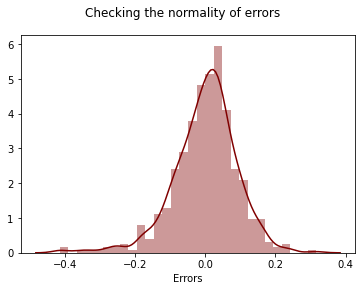

In [50]:
# Residual Analysis - Checking the normality of errors through a histogram

y_train_cnt = lr_2.predict(X_train_lm)

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 30, color='maroon')
fig.suptitle('Checking the normality of errors', fontsize = 12)
plt.xlabel('Errors', fontsize = 10)  

In [51]:
# Running the Test data to make predictictions using Model 6
# Scaling the variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.describe()

,yr,holiday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,day_Mon,day_Sat,day_Sun,day_Thurs,day_Tue,day_Wed,weather_Light Snow/Rain,weather_Misty+Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
#Splitting X & Y for test data

y_test = df_test.pop('cnt')
X_test = df_test

In [53]:
# Creating X_test_lm dataframe

X_test_lm = X_test[col]
X_test_lm.shape

(219, 15)

In [54]:
#Dropping variables we have dropped in Model 6

X_test_lm = X_test_lm.drop(['season_Spring','Month_Nov','holiday','hum','Month_Jul'], axis = 1)
X_test_lm.head()

,yr,temp,windspeed,season_Summer,season_Winter,Month_Jan,Month_Sep,day_Sun,weather_Light Snow/Rain,weather_Misty+Cloudy
184,0,0.831783,0.084219,0,0,0,0,0,0,1
535,1,0.901354,0.153728,1,0,0,0,0,0,0
299,0,0.511964,0.334206,0,1,0,0,0,0,1
221,0,0.881625,0.339570,0,0,0,0,0,0,0
152,0,0.817246,0.537414,1,0,0,0,0,0,0


In [55]:
# We add constant variable to test data

X_test_lm = sm.add_constant(X_test_lm)

In [56]:
# We make the predictions with Final model(Model 6)

y_pred_lm = lr_2.predict(X_test_lm)

In [57]:
y_pred_lm.head()

184    0.497485
535    0.916113
299    0.408908
221    0.560763
152    0.575605
dtype: float64

In [58]:
# Importing libraries for RMSE & r2_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#RMSE
np.sqrt(mean_squared_error(y_test, y_pred_lm))

0.09987914102175707

In [59]:
# Calculating R-squared score on the test set

r_squared = r2_score(y_test, y_pred_lm)
r_squared

0.7899637210155668

Text(0, 0.5, 'y_pred')

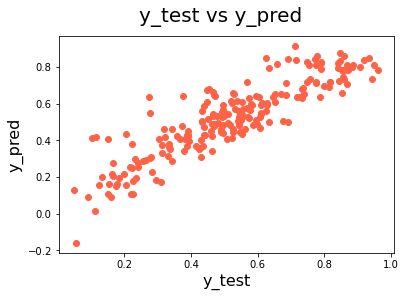

In [60]:
# Model Evaluation

# Plotting y_test and y_pred_lm 

fig = plt.figure()
plt.scatter(y_test, y_pred_lm, color='tomato')
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 16)
plt.ylabel('y_pred', fontsize = 16)  

> Conclusion:

We conclude our model building with the above plotted graph. In brief, below are the conclusions drawn:

- We have built a train model with VIFs and p-values both are within an acceptable range.
- We have run this train model on test data.
- We have done Residual Analysis to confirm our assumption of normal distribution of errors. This has yielded true.
- We have calculated the RMSE value to be 0.09. The low RMSE value indicates the good fit of the model.
- We have calculated the R-squared value to be 78.9%. This indicates to us that 78.9% data is closer to the best fit regression line.